In [1]:
# 이 장의 목표
# 내가 부동산 회사에 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트의 처음부터 끝까지 진행

In [2]:
##### 2.1 실제 데이터로 작업하기

In [3]:
##### 2.2 큰 그림 보기
# 이 데이터는 지도 학습이고, 회귀 중에서도 다변량 회귀 문제이고, 일반적인 배치 학습이 적절하다.
# 성능측정지표는 일반적으로 회귀 문제에 선호되는 RMSE(평균 제곱근 오차)를 사용한다.
# 이상치가 많은 경우에는 MAE(평균 절대 오차)를 고려해볼 수 있다.

In [4]:
##### 2.3 데이터 가져오기

# 웹 브라우저에서 직접 CSV 파일을 다운받아 실행할 수도 있지만 간단한 함수를 만들면 여러 장점이 있다.
# (1) 데이터가 정기적으로 변경되면 최근 데이터가 필요할 때 마다 스크립트를 실행하면 되니 유용하고,
# (2) 데이터를 내려받는 일을 자동화하면 여러 기기에 데이터셋을 설치해야 할 때도 편리하다.

# 데이터를 추출하는 함수
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
# 작업공간에 dataset/housing 디렉터리를 만들고 hosing.tgz 파일을 내려받고, housing.csv파일을 만든다.

fetch_housing_data()

In [6]:
# 데이터를 읽어들이는 함수

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
# 데이터 구조 훑어보기

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# info()메서드는 데이터의 간략한 설명과, 전체 행 수, 열의 데이터 타입, null이 아닌 값의 개수를 확인하는데 유용하다

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# 범주형 데이터의 카테고리를 확인할 때 counts()메서드를 쓴다.

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# describe()메서드는 숫자형 특성의 요약정보를 보여준다.

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


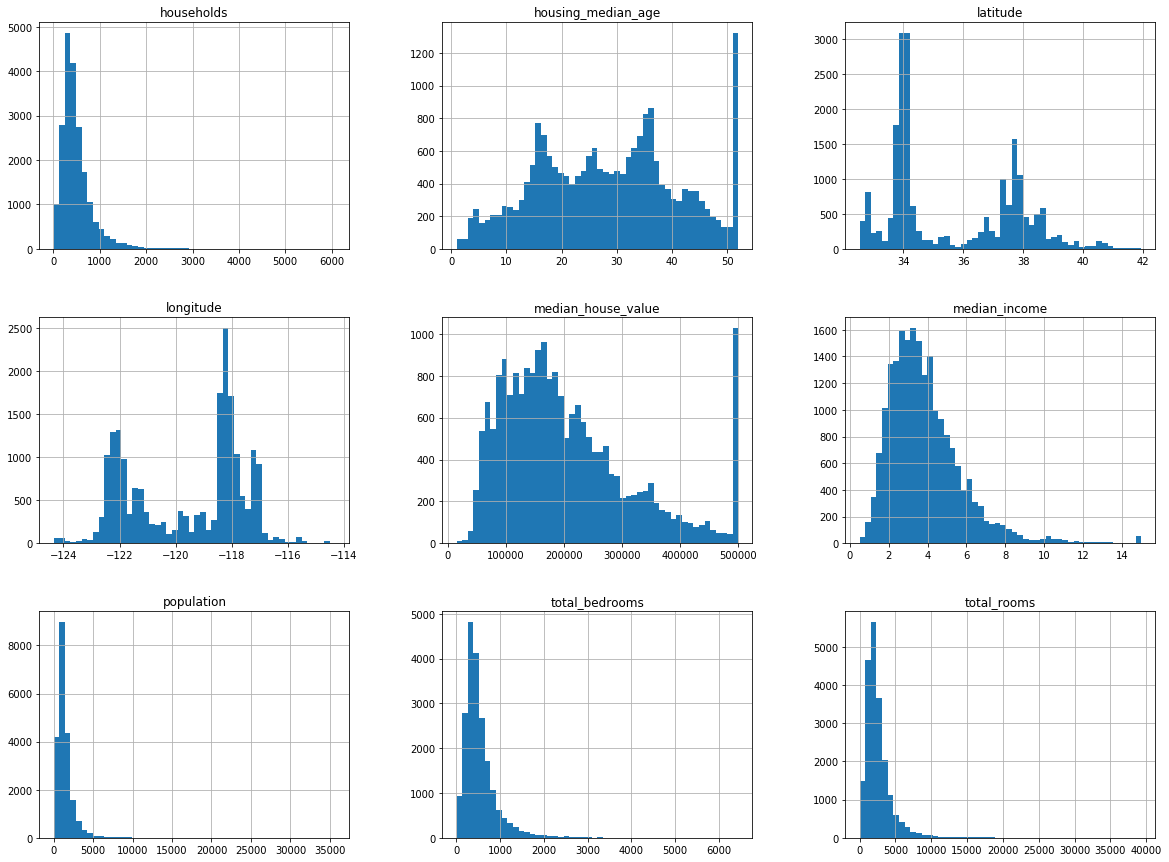

In [11]:
# 데이터의 형태를 빠르게 검토하는 다른 방법 : 히스토그램

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15));

In [12]:
# 테스트 세트 만들기 (20%)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

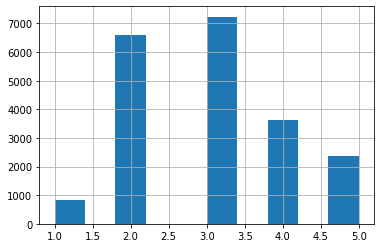

In [13]:
# 전문가가 median_income이 주택 가격을 예측하는 데 매우 중요하다고 이야기 해주었다고 가정
# 이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다. (sampling의 중요성)
# median_income이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다.

# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# 이 소득 카테고리의 히스토그램
housing["income_cat"].hist();

In [14]:
# 이제 소득 카테고리를 기반으로 층화 샘플링(모집단의 비율에 맞춰서 샘플링)


from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
# 전체 모집단에서 소득 카테고리의 비율
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
# test set의 카테고리의 비율
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [17]:
# 위의 두 개를 비교해서 잘 뽑혔다는 것을 확인할 수 있음
# 이제 income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌리자
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
####################################################################################################################################

In [19]:
##### 2.4 데이터 이해를 위한 탐색과 시각화

In [20]:
# training set에 대해서 탐색을 한다.
# 원래의 training set을 손상시키지 않기 위해 복사본을 만들어 사용
housing = strat_train_set.copy()

In [21]:
# 아래 plot 그릴 때 한글이 깨져서
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


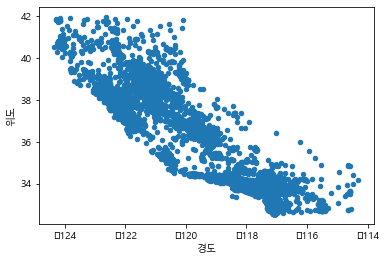

In [22]:
# (1) 지리적 데이터 시각화
# 지리 정보(위도와 경도)가 있으니 모든 구역을 산점도로 만들어 데이터를 시각화

ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도');

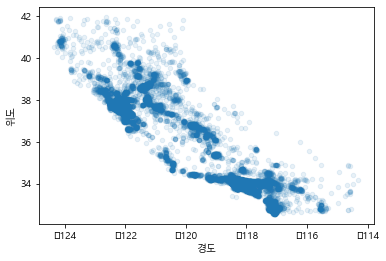

In [23]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도');

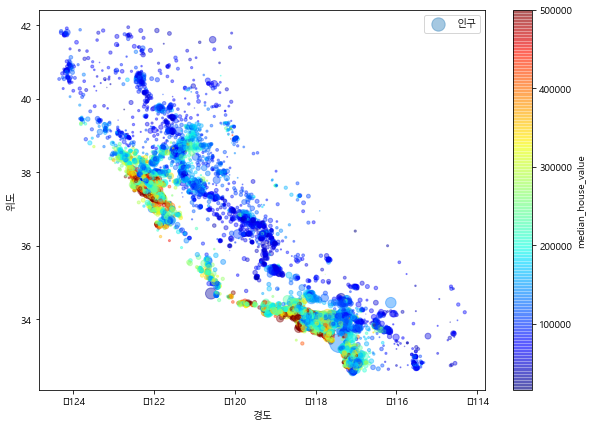

In [24]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend();

In [25]:
# (2) 상관관계 조사

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

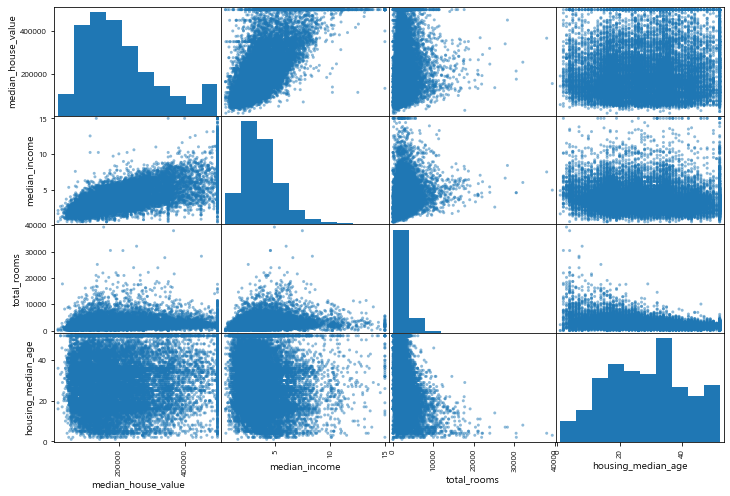

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

[0, 16, 0, 550000]

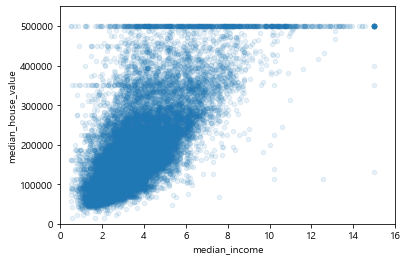

In [27]:
# 이 중 중간 주택 가격을 예측하는데 가장 유용할 것 같은 특성인 중간 소득과의 산점도를 크게 그려봄
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [ ]:
####################################################################################################################################

In [ ]:
##### 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
# 2.5.1 데이터 정제
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows
# total_bedrooms 특성에 값이 없는 경우를 볼 수 있음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [30]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1 : 전체 특성을 삭제함

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [31]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2 : 해당 구역을 제거

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [32]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3 : 중위수로 대체함
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)    # median이 수치형에서만 계산되니까 다른 값을 삭제한 것
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [38]:
imputer.statistics_     # imputer는 각 특성의 median을 계산해서 그 결과를 객체의 statistics_ 속성에 정의한다

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
X = imputer.transform(housing_num)   # 결측치를 median으로 바꾼 numpy array
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values)) # pandas df형태로 되돌리기
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [43]:
# 2.5.2 텍스트와 범주형 특성 다루기

housing_cat = housing['ocean_proximity']
housing_cat.head(10)                    # 범주형 자료이므로 중간값 계산이 안되니까, 텍스트를 숫자로 바꿔줌

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [44]:
# pandas의 factorize()는 카테고리를 정숫값으로 매핑해준다

housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [46]:
# 원-핫 인코딩

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
# 책에서 제시한 CategoricalEncoder는 안되는듯

In [ ]:
# 2.5.4 : 특성스케일링

# 모든 특성의 범위를 같도록 만들어주는 방법
# (1) min-max scailing : 0~1범위데 들도록 값을 조정하는 것
# (2) 표준화 : 평균0, 분산1을 갖게 만드는것

In [ ]:
# 2.6 모델 선택과 훈련
# 이후는 전반적인 머신러닝 데이터 분석 과정의 요약